# Car Parking Detection & Space Counter Using Deep Learning

In [4]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

Load Train and test

In [5]:
files_train = 0
files_validation = 0
cwd = os.getcwd()
folder = 'train_data/train'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_train +=len(files)
    
folder = 'train_data/test'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_validation +=len(files)

print(files_train, files_validation)

432 164


Set Key Parameters

In [6]:
img_width, img_height = 48,48
train_data_dir = 'train_data/train'
validation_data_dir = 'train_data/test'
nb_train_sample = files_train
nb_validation_sample = files_validation
batch_size = 32
epochs = 15
num_classes = 2

Build model on teh top of a pretrained VGG model

In [7]:
model = applications.VGG19(weights = "imagenet", include_top = False, input_shape = (img_width, img_height, 3))

In [8]:
model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <Conv2D name=block3_conv4, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <Conv2D name=block4_conv4, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <Conv2D name=block5_conv4, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [10]:
for layer in model.layers[:10]:
    layer.traiable = False

In [11]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss='categorical_crossentropy', 
                            optimizer=optimizers.SGD(learning_rate=0.0001, momentum=0.9), 
                            metrics=['accuracy'])

Data Augumentation

In [12]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, fill_mode="nearest", zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, fill_mode="nearest", zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, rotation_range=5)


train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [13]:
history = model_final.fit(
train_generator, steps_per_epoch=nb_train_sample//batch_size, 
    validation_steps=nb_validation_sample//batch_size, 
epochs = epochs, validation_data=validation_generator)

c:\Users\User\miniconda3\envs\FoodEase\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.4222 - loss: 0.8130

c:\Users\User\miniconda3\envs\FoodEase\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 586ms/step - accuracy: 0.4345 - loss: 0.8009 - val_accuracy: 0.7625 - val_loss: 0.4645
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7812 - loss: 0.3884 - val_accuracy: 1.0000 - val_loss: 0.0922
Epoch 3/15


c:\Users\User\miniconda3\envs\FoodEase\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 361ms/step - accuracy: 0.7810 - loss: 0.4220 - val_accuracy: 0.8875 - val_loss: 0.3135
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9062 - loss: 0.2556 - val_accuracy: 1.0000 - val_loss: 0.2441
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - accuracy: 0.9365 - loss: 0.2708 - val_accuracy: 0.8938 - val_loss: 0.2314
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9375 - loss: 0.1372 - val_accuracy: 1.0000 - val_loss: 0.1181
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - accuracy: 0.9734 - loss: 0.1373 - val_accuracy: 0.9500 - val_loss: 0.1625
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8438 - loss: 0.3766 - val_accuracy: 0.7500 - val_loss: 0.4032
Epoch 9/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.9571 - loss: 0.1356 - val_accuracy: 0.9438 - val_loss: 0.1430
Epoch 10/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9688 - loss: 0.0688 - val_accuracy: 1.0000 - val_loss: 0

In [14]:
history.history

{'accuracy': [0.5950000286102295,
  0.78125,
  0.8125,
  0.90625,
  0.9424999952316284,
  0.9375,
  0.9524999856948853,
  0.84375,
  0.9649999737739563,
  0.96875,
  0.9624999761581421,
  0.96875,
  0.973557710647583,
  1.0,
  0.9725000262260437],
 'loss': [0.6436120867729187,
  0.3883812427520752,
  0.37546294927597046,
  0.2556023895740509,
  0.24230393767356873,
  0.1372465193271637,
  0.14476202428340912,
  0.3765707015991211,
  0.12188345193862915,
  0.06878936290740967,
  0.09849777817726135,
  0.07605433464050293,
  0.08225289732217789,
  0.044087763875722885,
  0.07229066640138626],
 'val_accuracy': [0.762499988079071,
  1.0,
  0.887499988079071,
  1.0,
  0.893750011920929,
  1.0,
  0.949999988079071,
  0.75,
  0.9437500238418579,
  1.0,
  0.918749988079071,
  1.0,
  0.949999988079071,
  1.0,
  0.9437500238418579],
 'val_loss': [0.464539110660553,
  0.0921778604388237,
  0.31345000863075256,
  0.2440643459558487,
  0.23144297301769257,
  0.11812075972557068,
  0.162504658102989

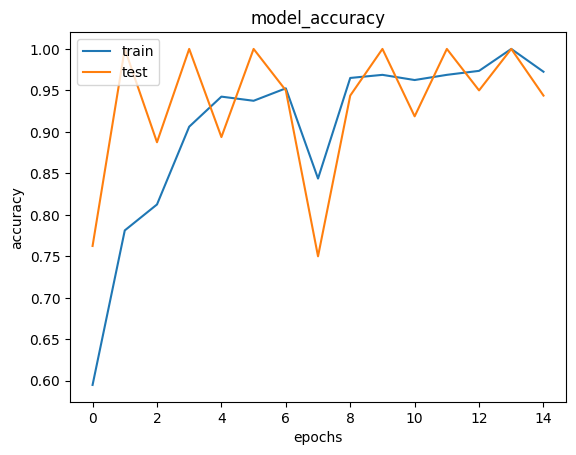

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

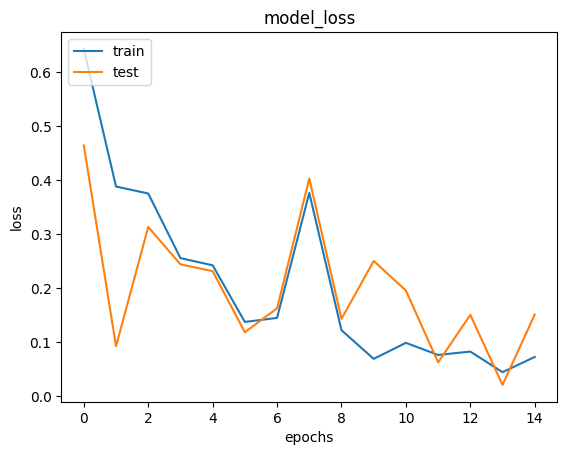

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [17]:
model_final.save('model_final.h5')

In [18]:
class_dictionary = {}
class_dictionary[0]  = 'no_car'
class_dictionary[1]  = 'car'

In [19]:
class_dictionary

{0: 'no_car', 1: 'car'}

Predictive System

In [20]:
import cv2
import numpy as np

def make_prediction(image):
    image = cv2.imread(image)
    if image is None:  # Check if the image was loaded successfully
        raise ValueError(f"Image not found or unable to load: {image}")
    image = cv2.resize(image, (48, 48))
    img = image / 255
    # (1, 48, 48, 3) -> 4D Tensor
    img = np.expand_dims(img, axis=0)
    
    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label

In [21]:
make_prediction("train_data/test/occupied/spot7.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


'car'

In [22]:
make_prediction("train_data/test/empty/spot224.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'no_car'

In [23]:
make_prediction("image.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'car'